In [1]:
import numpy as np
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1" 

import matplotlib.pyplot as plt

from Models.LSTM.LSTM import LSTMModel
from Models.LSTM.training.configs import (
    LAYER_VARIATIONS, UNIT_VARIATIONS, DIRECTION_VARIATIONS,
)

from Datasets.nusax_indonesia import NusaxIndonesiaDataset

SAVE_PATH = "Models/LSTM/training"



In [2]:
dropout_rate = 0.2
learning_rate = 0.005
embedding_dim = 128
max_tokens = 10000

In [3]:
# Load dataset
dataset = NusaxIndonesiaDataset(token_maksimum=max_tokens)
if dataset.data_loaded_successfully:
    print("Dataset loaded successfully.")
    data = dataset.get_data()
    X_train = data["x_train"]
    X_train_text = data["x_train_text"]
    y_train = data["y_train"]
    y_train_text = data["y_train_text"]
    X_val = data["x_val"]
    X_val_text = data["x_val_text"]
    y_val = data["y_val"]
    y_val_text = data["y_val_text"]
    X_test = data["x_test"]
    X_test_text = data["x_test_text"]
    y_test = data["y_test"]
    y_tes_text = data["y_test_text"]
    vectorizer = data["vectorizer"]
    label_encoder = data["label_encoder"]
    vocab = data["vocab"]
    sequence_length = dataset.panjang_sekuens
else:
    print("Failed to load dataset.")    

1. Memuat Data
Jumlah data train: 500
Jumlah data validasi: 100
Jumlah data test: 400
Max sequence length (train): 54
Max sequence length (val): 48
Max sequence length (test): 57

2. Label Encoding

3. Vektorisasi

4. Tokenisasi data teks
Dataset loaded successfully.


In [4]:
print(data["y_train"].shape)
print(data["x_train"].shape)
print(sequence_length)

(500,)
(500, 72)
72


In [5]:
def plot_loss_curves(history, title):
    """Displays validation loss and training loss per epoch"""
    
    plt.plot(history.history["loss"], label = "Train Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

In [6]:
def train_and_evaluate_all(variation_dict, variation_name):
    """Train and evaluate CNN models for each config in variation_dict."""
    
    print(f"\n\n=== {variation_name} Variations ===\n")
    for name, config in variation_dict.items():
        print(f"\n--- Training: {name} ---")

        # Build
        weights_dir = f"{SAVE_PATH}/weights/{variation_name}"
        model = LSTMModel.from_config(
            config,
            vocab_size= len(vocab),
            embedding_dim= embedding_dim,
            sequence_length= sequence_length,
            num_classes= len(label_encoder.classes_),
            weights_dir = weights_dir,
        )
        model.build(dropout_rate=dropout_rate, learning_rate=learning_rate)

        # Train & Evaluate
        model.train(X_train, y_train, X_val, y_val)
        f1_score = model.evaluate(X_test, y_test)

        # Save weights
        model.save()

        # Log results
        print(f"{name} | Macro F1 Score: {f1_score:.4f}")
        plot_loss_curves(model.history, f"{name} | Training & Validation Loss")



=== Layer Variations ===


--- Training: 1 Layer LSTM ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,611 (1.57 MB)

 Trainable params: 412,611 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 6s - 390ms/step - accuracy: 0.3780 - loss: 1.1016 - val_accuracy: 0.3800 - val_loss: 1.0827
Epoch 2/10
16/16 - 2s - 104ms/step - accuracy: 0.3720 - loss: 1.0855 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 3/10
16/16 - 1s - 71ms/step - accuracy: 0.3740 - loss: 1.0832 - val_accuracy: 0.3800 - val_loss: 1.0788
Epoch 4/10
16/16 - 1s - 90ms/step - accuracy: 0.3980 - loss: 1.0799 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 5/10
16/16 - 1s - 91ms/step - accuracy: 0.3600 - loss: 1.0845 - val_accuracy: 0.3800 - val_loss: 1.0786
Epoch 6/10
16/16 - 2s - 95ms/step - accuracy: 0.4100 - loss: 1.0765 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 7/10
16/16 - 2s - 113ms/step - accuracy: 0.3880 - loss: 1.0783 - val_accuracy: 0.3800 - val_loss: 1.0865
Epoch 8/10
16/16 - 1s - 81ms/step - accuracy: 0.3980 - loss: 1.0802 - val_accuracy: 0.3800 - val_loss: 1.0759
Epoch 9/10
16/16 - 1s - 81ms/step - accuracy: 0.3780 - loss: 1.1352 - val_accuracy: 0.3800 - val_loss: 1.1221
Epoch 1

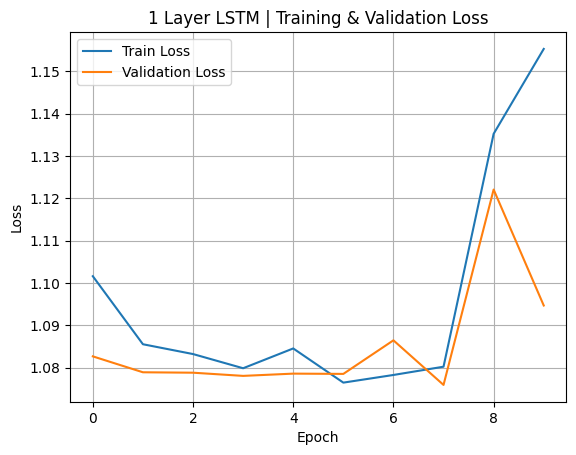


--- Training: 2 Layer LSTM ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,931 (1.62 MB)

 Trainable params: 424,931 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 10s - 603ms/step - accuracy: 0.3900 - loss: 1.0992 - val_accuracy: 0.3800 - val_loss: 1.0944
Epoch 2/10
16/16 - 2s - 108ms/step - accuracy: 0.3720 - loss: 1.0887 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 3/10
16/16 - 2s - 112ms/step - accuracy: 0.3800 - loss: 1.0885 - val_accuracy: 0.3800 - val_loss: 1.0800
Epoch 4/10
16/16 - 2s - 111ms/step - accuracy: 0.4180 - loss: 1.0821 - val_accuracy: 0.3800 - val_loss: 1.0800
Epoch 5/10
16/16 - 2s - 104ms/step - accuracy: 0.3780 - loss: 1.0798 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 6/10
16/16 - 2s - 103ms/step - accuracy: 0.3640 - loss: 1.0844 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 7/10
16/16 - 2s - 101ms/step - accuracy: 0.3660 - loss: 1.0786 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 8/10
16/16 - 2s - 96ms/step - accuracy: 0.4280 - loss: 1.0807 - val_accuracy: 0.5400 - val_loss: 0.9755
Epoch 9/10
16/16 - 2s - 100ms/step - accuracy: 0.4500 - loss: 1.0286 - val_accuracy: 0.3800 - val_loss: 1.0896
E

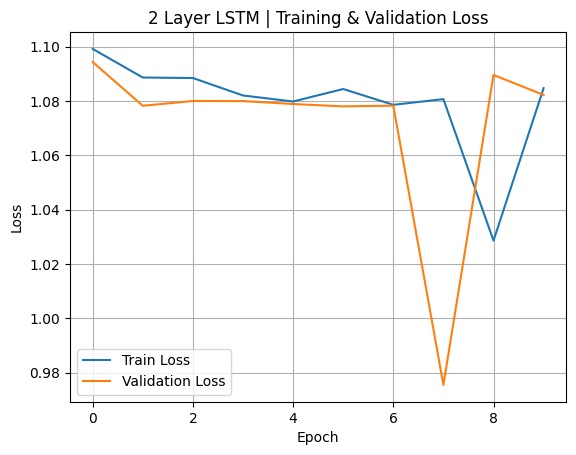


--- Training: 3 Layer LSTM ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 72, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 72, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 428,019 (1.63 MB)

 Trainable params: 428,019 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 12s - 759ms/step - accuracy: 0.3660 - loss: 1.0928 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 2/10
16/16 - 2s - 134ms/step - accuracy: 0.3820 - loss: 1.0885 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 3/10
16/16 - 2s - 152ms/step - accuracy: 0.3840 - loss: 1.0779 - val_accuracy: 0.3800 - val_loss: 1.0785
Epoch 4/10
16/16 - 2s - 136ms/step - accuracy: 0.3920 - loss: 1.0804 - val_accuracy: 0.4700 - val_loss: 1.0503
Epoch 5/10
16/16 - 2s - 131ms/step - accuracy: 0.3680 - loss: 1.1024 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 6/10
16/16 - 2s - 129ms/step - accuracy: 0.3660 - loss: 1.0910 - val_accuracy: 0.3800 - val_loss: 1.0797
Epoch 7/10
16/16 - 2s - 133ms/step - accuracy: 0.3860 - loss: 1.0793 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 8/10
16/16 - 2s - 135ms/step - accuracy: 0.3460 - loss: 1.0838 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 9/10
16/16 - 2s - 123ms/step - accuracy: 0.3680 - loss: 1.0817 - val_accuracy: 0.3800 - val_loss: 1.0783


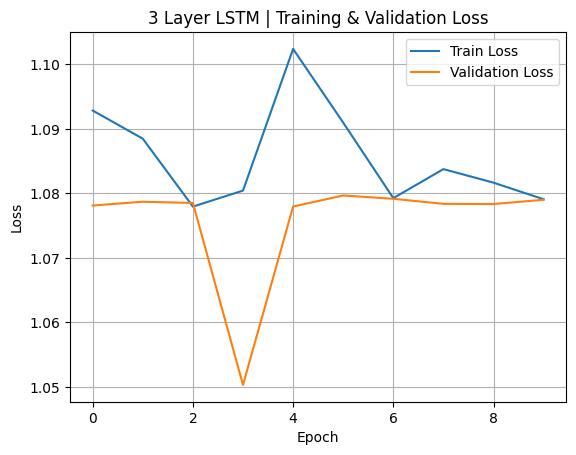

In [7]:
train_and_evaluate_all(LAYER_VARIATIONS, "Layer")




=== Unit Variations ===


--- Training: 32 Units ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 32)         │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 392,035 (1.50 MB)

 Trainable params: 392,035 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 8s - 517ms/step - accuracy: 0.3760 - loss: 1.1007 - val_accuracy: 0.3800 - val_loss: 1.0843
Epoch 2/10
16/16 - 1s - 82ms/step - accuracy: 0.3400 - loss: 1.0804 - val_accuracy: 0.3900 - val_loss: 1.0781
Epoch 3/10
16/16 - 1s - 90ms/step - accuracy: 0.3660 - loss: 1.0861 - val_accuracy: 0.3800 - val_loss: 1.0807
Epoch 4/10
16/16 - 2s - 98ms/step - accuracy: 0.3700 - loss: 1.0843 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 5/10
16/16 - 1s - 88ms/step - accuracy: 0.3740 - loss: 1.0784 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 6/10
16/16 - 1s - 91ms/step - accuracy: 0.3740 - loss: 1.0834 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 7/10
16/16 - 1s - 90ms/step - accuracy: 0.3860 - loss: 1.0788 - val_accuracy: 0.3900 - val_loss: 1.0776
Epoch 8/10
16/16 - 1s - 84ms/step - accuracy: 0.4000 - loss: 1.0799 - val_accuracy: 0.4000 - val_loss: 1.0774
Epoch 9/10
16/16 - 1s - 90ms/step - accuracy: 0.3900 - loss: 1.0656 - val_accuracy: 0.4200 - val_loss: 1.0608
Epoch 10/

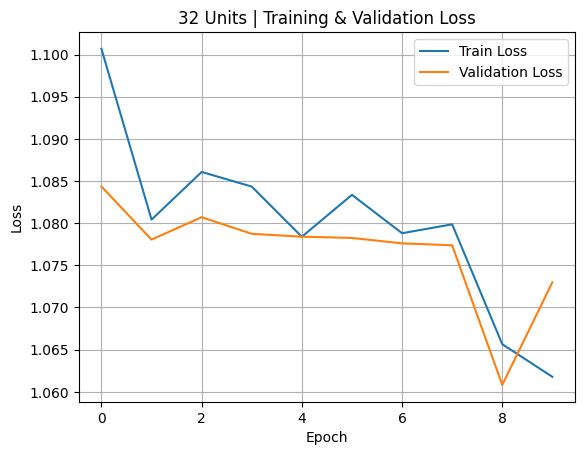


--- Training: 64 Units ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 445,635 (1.70 MB)

 Trainable params: 445,635 (1.70 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 10s - 650ms/step - accuracy: 0.4100 - loss: 1.0899 - val_accuracy: 0.3800 - val_loss: 1.1333
Epoch 2/10
16/16 - 4s - 265ms/step - accuracy: 0.3640 - loss: 1.1038 - val_accuracy: 0.3800 - val_loss: 1.0795
Epoch 3/10
16/16 - 2s - 139ms/step - accuracy: 0.3760 - loss: 1.0825 - val_accuracy: 0.3800 - val_loss: 1.0792
Epoch 4/10
16/16 - 2s - 118ms/step - accuracy: 0.3420 - loss: 1.0832 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 5/10
16/16 - 2s - 119ms/step - accuracy: 0.3720 - loss: 1.0815 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 6/10
16/16 - 2s - 110ms/step - accuracy: 0.3820 - loss: 1.0817 - val_accuracy: 0.3800 - val_loss: 1.0324
Epoch 7/10
16/16 - 2s - 132ms/step - accuracy: 0.4480 - loss: 1.1019 - val_accuracy: 0.3900 - val_loss: 1.0703
Epoch 8/10
16/16 - 2s - 129ms/step - accuracy: 0.4420 - loss: 1.1202 - val_accuracy: 0.3800 - val_loss: 1.0921
Epoch 9/10
16/16 - 2s - 112ms/step - accuracy: 0.4060 - loss: 1.1165 - val_accuracy: 0.3800 - val_loss: 1.0809


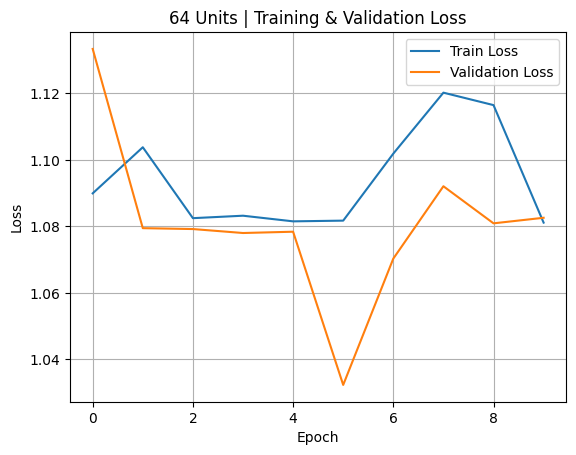


--- Training: 128 Units ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 626,563 (2.39 MB)

 Trainable params: 626,563 (2.39 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 13s - 810ms/step - accuracy: 0.3520 - loss: 1.1166 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 2/10
16/16 - 5s - 291ms/step - accuracy: 0.3540 - loss: 1.0911 - val_accuracy: 0.3800 - val_loss: 1.0802
Epoch 3/10
16/16 - 5s - 289ms/step - accuracy: 0.3340 - loss: 1.0913 - val_accuracy: 0.3800 - val_loss: 1.0795
Epoch 4/10
16/16 - 6s - 356ms/step - accuracy: 0.4020 - loss: 1.0841 - val_accuracy: 0.3800 - val_loss: 1.0796
Epoch 5/10
16/16 - 10s - 602ms/step - accuracy: 0.3720 - loss: 1.0819 - val_accuracy: 0.3800 - val_loss: 1.0802
Epoch 6/10
16/16 - 5s - 334ms/step - accuracy: 0.3560 - loss: 1.0835 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 7/10
16/16 - 5s - 343ms/step - accuracy: 0.3520 - loss: 1.0797 - val_accuracy: 0.3800 - val_loss: 1.0791
Epoch 8/10
16/16 - 5s - 313ms/step - accuracy: 0.3940 - loss: 1.0783 - val_accuracy: 0.3800 - val_loss: 1.0800
Epoch 9/10
16/16 - 5s - 292ms/step - accuracy: 0.3900 - loss: 1.0792 - val_accuracy: 0.3800 - val_loss: 1.0783

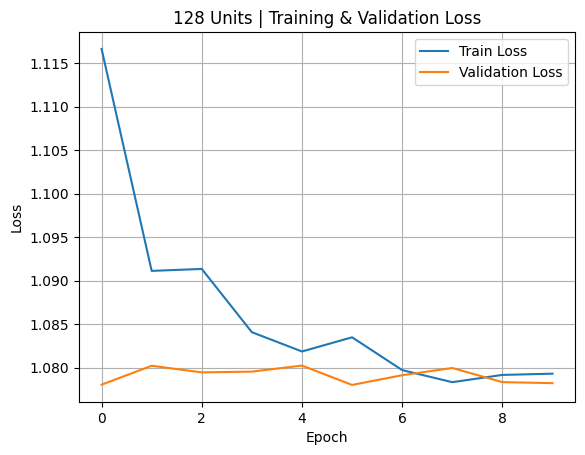

In [8]:
train_and_evaluate_all(UNIT_VARIATIONS, "Unit")



=== Direction Variations ===


--- Training: Unidirectional ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 72, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,931 (1.62 MB)

 Trainable params: 424,931 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 9s - 588ms/step - accuracy: 0.3340 - loss: 1.0953 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 2/10
16/16 - 2s - 101ms/step - accuracy: 0.3860 - loss: 1.0879 - val_accuracy: 0.3800 - val_loss: 1.0905
Epoch 3/10
16/16 - 2s - 97ms/step - accuracy: 0.3840 - loss: 1.0832 - val_accuracy: 0.3800 - val_loss: 1.0779
Epoch 4/10
16/16 - 2s - 98ms/step - accuracy: 0.3780 - loss: 1.0788 - val_accuracy: 0.3800 - val_loss: 1.0781
Epoch 5/10
16/16 - 2s - 106ms/step - accuracy: 0.3820 - loss: 1.0765 - val_accuracy: 0.3800 - val_loss: 1.0801
Epoch 6/10
16/16 - 2s - 103ms/step - accuracy: 0.3840 - loss: 1.0810 - val_accuracy: 0.3700 - val_loss: 1.0780
Epoch 7/10
16/16 - 2s - 103ms/step - accuracy: 0.4980 - loss: 0.9795 - val_accuracy: 0.3600 - val_loss: 1.1198
Epoch 8/10
16/16 - 2s - 106ms/step - accuracy: 0.4360 - loss: 1.0239 - val_accuracy: 0.3800 - val_loss: 1.0731
Epoch 9/10
16/16 - 2s - 104ms/step - accuracy: 0.4500 - loss: 1.0002 - val_accuracy: 0.4300 - val_loss: 1.0916
Epo

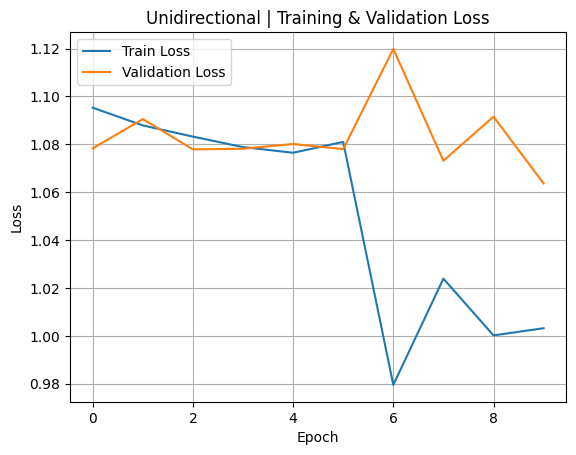


--- Training: Bidirectional ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 72, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 503,235 (1.92 MB)

 Trainable params: 503,235 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 15s - 941ms/step - accuracy: 0.5120 - loss: 0.9649 - val_accuracy: 0.6200 - val_loss: 0.8286
Epoch 2/10
16/16 - 2s - 149ms/step - accuracy: 0.7440 - loss: 0.6420 - val_accuracy: 0.6900 - val_loss: 0.7299
Epoch 3/10
16/16 - 2s - 145ms/step - accuracy: 0.9320 - loss: 0.2273 - val_accuracy: 0.7600 - val_loss: 0.7759
Epoch 4/10
16/16 - 2s - 153ms/step - accuracy: 0.9820 - loss: 0.0924 - val_accuracy: 0.7700 - val_loss: 0.7958
Epoch 5/10
16/16 - 2s - 150ms/step - accuracy: 0.9920 - loss: 0.0420 - val_accuracy: 0.7600 - val_loss: 0.9577
Epoch 6/10
16/16 - 2s - 143ms/step - accuracy: 0.9920 - loss: 0.0505 - val_accuracy: 0.7800 - val_loss: 0.9376
Epoch 7/10
16/16 - 2s - 145ms/step - accuracy: 0.9940 - loss: 0.0399 - val_accuracy: 0.8000 - val_loss: 1.0161
Epoch 8/10
16/16 - 2s - 150ms/step - accuracy: 0.9940 - loss: 0.0330 - val_accuracy: 0.8000 - val_loss: 1.0512
Epoch 9/10
16/16 - 2s - 153ms/step - accuracy: 0.9940 - loss: 0.0228 - val_accuracy: 0.8000 - val_loss: 1.0746


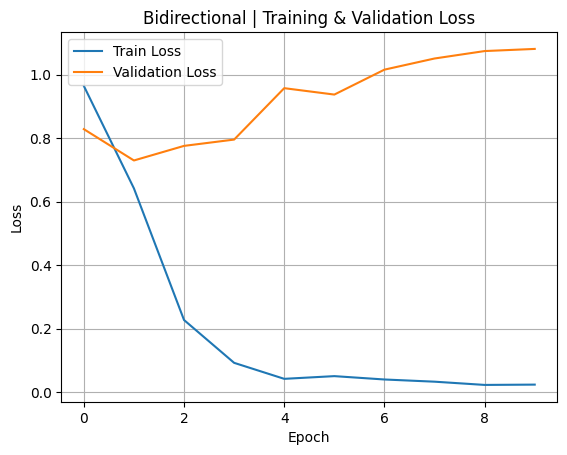


--- Training: Mixed Direction ---


c:\Users\Acer\Documents\Pemrogramman\ML\Tubes2_ML\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 72, 128)        │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 72, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 482,531 (1.84 MB)

 Trainable params: 482,531 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 - 11s - 713ms/step - accuracy: 0.3460 - loss: 1.0935 - val_accuracy: 0.3800 - val_loss: 1.0876
Epoch 2/10
16/16 - 2s - 142ms/step - accuracy: 0.3640 - loss: 1.0870 - val_accuracy: 0.3800 - val_loss: 1.0863
Epoch 3/10
16/16 - 2s - 135ms/step - accuracy: 0.3500 - loss: 1.0900 - val_accuracy: 0.3800 - val_loss: 1.0898
Epoch 4/10
16/16 - 2s - 128ms/step - accuracy: 0.3860 - loss: 1.0861 - val_accuracy: 0.3800 - val_loss: 1.0794
Epoch 5/10
16/16 - 2s - 132ms/step - accuracy: 0.4040 - loss: 1.0854 - val_accuracy: 0.3800 - val_loss: 1.0797
Epoch 6/10
16/16 - 2s - 130ms/step - accuracy: 0.4200 - loss: 1.0732 - val_accuracy: 0.3800 - val_loss: 1.0864
Epoch 7/10
16/16 - 2s - 133ms/step - accuracy: 0.3960 - loss: 1.0823 - val_accuracy: 0.3800 - val_loss: 1.0807
Epoch 8/10
16/16 - 2s - 128ms/step - accuracy: 0.3940 - loss: 1.0856 - val_accuracy: 0.3800 - val_loss: 1.0824
Epoch 9/10
16/16 - 2s - 131ms/step - accuracy: 0.3940 - loss: 1.0808 - val_accuracy: 0.3800 - val_loss: 1.0813


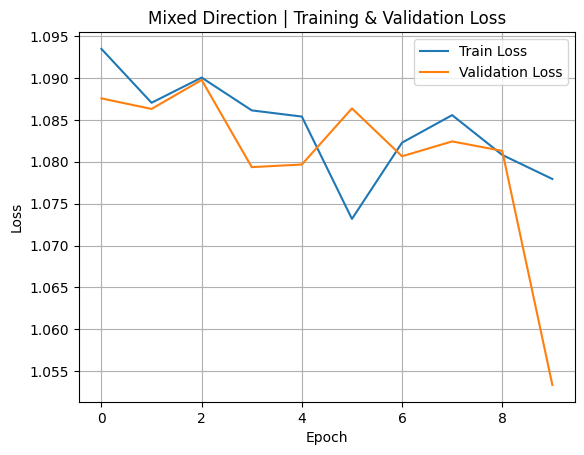

In [9]:
train_and_evaluate_all(DIRECTION_VARIATIONS, "Direction")
